In [89]:
import numpy as np
import scipy.stats as s
import configparser
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10, 6)
import matplotlib.pyplot as plt
import scipy.stats as ss
from datetime import datetime

from nltk import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/marat/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [90]:
dataset = pd.read_csv('downloads/sber2.csv', na_values='None')
print(dataset.columns)

Index(['Is_human', 'Text', 'Predict'], dtype='object')


In [98]:
k_bots = dataset['operator'] == 'bot'
k_humans = dataset['operator'] == 'human'
plt.hist(dataset[k_bots]['discriminator'], label='bot', alpha=0.3)
plt.hist(dataset[k_humans]['discriminator'], label='human', alpha=0.3)
plt.legend()
plt.show()

KeyError: 'operator'

In [12]:
dataset

Is_human                                               Text   Predict
0             0   <COR_START> –í—á–µ—Ä–∞ –≤ –ø–ª–∞—Ç–µ–∂–Ω–æ–º –ø–æ—Ä—É—á–µ–Ω–∏–∏ –Ω–∞ –ø–µ...  0.403804
1             1   <COR_START> –¥–æ–±—Ä—ã–π –≤–µ—á–µ—Ä , —è —Å–æ–∑–¥–∞–ª–∞ –ø–ª–∞—Ç–µ–∂–Ω—ã...  0.555778
2             0   <COR_START> –î–æ–±—Ä—ã–π –¥–µ–Ω—å , –ø—Ä–∏ –∞–∫—Ç–∏–≤–∞—Ü–∏–∏ —ç–ª –ø–æ...  0.518519
3             0   <COR_START> –ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ ! –ü–æ—á–µ–º—É —è –≤—Ç–æ—Ä–æ–π –¥–µ...  0.556421
4             0   <COR_START> –î–æ–±—Ä—ã–π –¥–µ–Ω—å . –ü–æ–¥—Å–∫–∞–∂–∏—Ç–µ , –ø–æ–∂–∞–ª—É...  0.483685
5             1   <COR_START> –∏–Ω—Ç–µ—Ä–µ—Å—É–µ—Ç –∫—Ä–µ–¥–∏—Ç –¥–ª—è –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–∏...  0.354521
6             1   <COR_START> <PAUSE>  <ANS_START>  –°–ª—É–∂–±–∞ —Ç–µ—Ö–Ω...  0.259566
7             1   <COR_START> –ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ , –∑–∞–±–ª–æ–∫–∏—Ä–æ–≤–∞–Ω –º–æ–± –±...  0.908006
8             1   <COR_START> –∫–æ–¥ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–µ–Ω–∏—è –∏–∑–º–µ–Ω–µ–Ω–∏—è –ø–æ—á—Ç—ã...  0.527716
9             1   <COR_START> –∫–∞–∫ —Å–¥–µ–ª–∞—Ç—å –≤—ã–±–æ—Ä–∫—É –ø–æ –≤—Ö–æ–¥—è—â–∏–º –ø...  0.511076
10            0   <COR_START> –î–æ–±—Ä—ã–π –¥–µ–Ω—å . –ö–∞–∫ –≤–µ—Ä–Ω—É—Ç—å —Å—Ç–∞—Ä–æ–µ ...  0.514646
11            0   <COR_START> –∫–∞–∫–æ–π –∫–æ–¥ –≤–∞–ª—é—Ç–Ω–æ–π –æ–ø–µ—Ä–∞—Ü–∏–∏ , –ø–µ—Ä...  0.439953
12            0   <COR_START> –∫–∞–∫ –∑–∞–ø–æ–ª–Ω–∏—Ç—å –≤ —ç–ª . —Ä–µ–µ—Å—Ç—Ä–µ –Ω–∞ –æ...  0.585139
13            1   <COR_START> –ö–∞–∫ –Ω–∞—Å—Ç—Ä–æ–∏—Ç—å —É–≤–µ–¥–æ–º–ª–µ–Ω–∏—è –æ –∑–∞—á–∏—Å...  0.224544
14            1   <COR_START> –î–æ–±—Ä—ã–π –¥–µ–Ω—å ! –≤—á–µ—Ä–∞ –æ—Ç–ø—Ä–∞–≤–ª—è–ª–∞ –∑–∞...  0.946423
15            0   <COR_START> –∑–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ . <COR_START> —è —Ö–æ—Ç–µ...  0.529124
16            1   <COR_START> –¥–æ–±—Ä—ã–π –¥–µ–Ω—å  <ANS_START>  –°–ª—É–∂–±–∞ ...  0.725309
17            0   <COR_START> –∑–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ —É –º–µ–Ω—è –≤–æ–ø—Ä–æ—Å –∑–∞ –≤—á–µ...  0.380467
18            0   <COR_START> –î–æ–±—Ä—ã–π –¥–µ–Ω—å ! –ü–æ–¥—Å–∫–∞–∂–∏—Ç–µ –ø–æ–∂–∞–ª—É–π—Å...  0.501608
19            0   <COR_START> –∫–∞–∫ –ø–µ—Ä–µ–π—Ç–∏ –Ω–∞ —Å—Ç–∞—Ä—É—é –≤–µ—Ä—Å–∏—é —Å–∞–π—Ç...  0.465447
20            0   <COR_START> –≥–¥–µ –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å —Ä–µ–∫–≤–∏–∑–∏—Ç—ã –±–∞–Ω–∫–∞ ? ...  0.545405
21            0   <COR_START> –∫–∞–∫ –±—ã—Å—Ç—Ä–æ –æ–±—Ä–∞–±–æ—Ç–∞—é—Ç –º–æ–π –ø–ª–∞—Ç–µ–∂ ...  0.526938
22            1   <COR_START> –ü—Ä–∏ —Å–æ–≤–µ—Ä—à–µ–Ω–∏–∏ —Å–∞–º–æ–∏–Ω–∫–∞—Å–∞—Ü–∏–∏ –±—ã–ª–æ...  0.907354
23            1   <COR_START> –î–æ–±—Ä—ã–π –¥–µ–Ω—å , —É –Ω–∞—Å –Ω–∞–ª–æ–≥–æ–≤–∞—è –∑–∞–±...  0.483737
24            1   <COR_START> –î–æ–±—Ä—ã–π –¥–µ–Ω—å ! –°–µ–≥–æ–¥–Ω—è –≤ –æ–Ω–ª–∞–π–Ω-–±–∞...  0.642582
25            1   <COR_START> –∫–æ–≥–¥–∞ —Å–æ–∑–¥–∞–µ–º –∫–æ–Ω—Ç—Ä–∞–≥–µ–Ω—Ç –∏—Ö –Ω—É–∂–Ω–æ...  0.270623
26            0   <COR_START> –ø–ª–∞—Ç–µ–∂ ‚Ññ 11 –æ—Ç 14 . 05 . 2017 –Ω–∞–∑...  0.324754
27            0   <COR_START> –ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ ! –Ø —Ö–æ—Ç–µ–ª —Å–¥–µ–ª–∞—Ç—å —Å–∞...  0.375200
28            0   <COR_START> –ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ , –∫–∞–∫ —Ä–∞—Å–ø–µ—á–∞—Ç–∞—Ç—å –≤—ã...  0.328499
29            1   <COR_START> –ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ ! –ö–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º –º–æ–∂–Ω...  0.959945
...         ...                                                ...       ...
56070         1   <COR_START> –ü—Ä–∏ –ø–µ—Ä–≤–æ–º –≤—Ö–æ–¥–µ –∑–∞–ø—Ä–∞—à–∏–≤–∞–µ—Ç—Å—è –õ–æ...  0.349505
56071         0   <COR_START> –ü–æ—á–µ–º—É –Ω–µ –ø–æ—Å–ø—É–ø–∏–ª–∏ –¥–µ–Ω—å–≥–∏ –æ—Ç 31 ...  0.360194
56072         1   <COR_START> –∑–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ <MAN_START> –°–ª—É–∂–±–∞ —Ç...  0.535751
56073         1   <COR_START> –î–æ–±—Ä—ã–π –¥–µ–Ω—å ! 28 . 04 . 2017 —è —Å–¥...  0.691941
56074         1   <COR_START> –ì–¥–µ –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å —Å—Ç–∞–≤–∫–∏ –ø–æ –¥–µ–ø–æ–∑–∏—Ç—É...  0.867760
56075         1   <COR_START> –î–û–ë–†–´–ô –î–ï–ù–¨ . <MAN_START> –°–ª—É–∂–±–∞ ...  0.526790
56076         1   <COR_START> –î–æ–±—Ä—ã–π –≤–µ—á–µ—Ä ! –û—á–µ–Ω—å –æ—á–µ–Ω—å –æ—á–µ–Ω—å ...  0.442504
56077         1   <COR_START> –¥–æ–±—Ä—ã–π –¥–µ–Ω—å –ø–æ–¥—Å–∫–∞–∂–∏—Ç–µ –

In [92]:
# data = pd.read_csv(config['out_tsv'], sep='\t')
data = pd.read_csv('target/sber2.tsv', sep='\t', na_values='None')

In [93]:
def plot_beta(bot, human, rnd, title='', legend=True):
    neg, pos = bot
    x = np.linspace(ss.beta.ppf(0.01, pos, neg), ss.beta.ppf(0.99, pos, neg), 100)
    label = 'bot {}/({}+{})={:.2f}'.format(pos, neg, pos, pos/(neg+pos))
    plt.plot(x, ss.beta.pdf(x, pos, neg), 'r-', lw=5, alpha=0.6, label=label)

    neg, pos = human
    x = np.linspace(ss.beta.ppf(0.01, pos, neg), ss.beta.ppf(0.99, pos, neg), 100)
    label = 'human {}/({}+{})={:.2f}'.format(pos, neg, pos, pos/(neg+pos))
    plt.plot(x, ss.beta.pdf(x, pos, neg), 'g-', lw=5, alpha=0.6, label=label)
       
    neg, pos = rnd
    x = np.linspace(ss.beta.ppf(0.01, pos, neg), ss.beta.ppf(0.99, pos, neg), 100)
    label = 'random {}/({}+{})={:.2f}'.format(pos, neg, pos, pos/(neg+pos))
    plt.plot(x, ss.beta.pdf(x, pos, neg), 'b-', lw=5, alpha=0.6, label=label)
    
    
    ztest = sm.stats.proportions_ztest([bot[1], human[1]], [sum(bot), sum(human)], alternative='two-sided')
    plt.title('{} (Fisher test z={:.3f}, pvalue={:.4f})'.format(title, *ztest))
    if legend:
        plt.legend()
    plt.xlim(0, 1)

In [94]:
def compare(data, eps=1e-2):
    res = {}
    for g, d in data.groupby(['operator', 'is_meaningful']):
        x = d['question'].apply(lambda x: len(word_tokenize(x)))
        res[g] = (x <= 15).sum()
#         res[g] = len(d)

    bot = [res.get(('bot', 0), eps), res.get(('bot', 1), eps)]
    human = [res.get(('human', 0), eps), res.get(('human', 1), eps)]
    rnd = [res.get(('random', 0), eps), res.get(('random', 1), eps)]

    chi = s.chisquare(bot, f_exp=human)
    ztest = sm.stats.proportions_ztest([bot[1], human[1]], [sum(bot), sum(human)], alternative='two-sided')
    
    return [chi.pvalue, ztest], [bot, human, rnd], human[1] / (human[0] + human[1]), bot[1] / (bot[1] + bot[0]), rnd[1] / (rnd[1] + rnd[0])

Index(['chat_id', 'user', 'question_id', 'operator', 'question', 'answer',
       'time_asked', 'time_answered', 'is_meaningful', 'discriminator_score'],
      dtype='object')
overall 1587 ([4.9951179132231516e-13, (-3.7074796666729632, 0.00020933221844733027)], [[120, 209], [109, 341], [241, 116]], 0.75777777777777777, 0.63525835866261393, 0.32492997198879553)


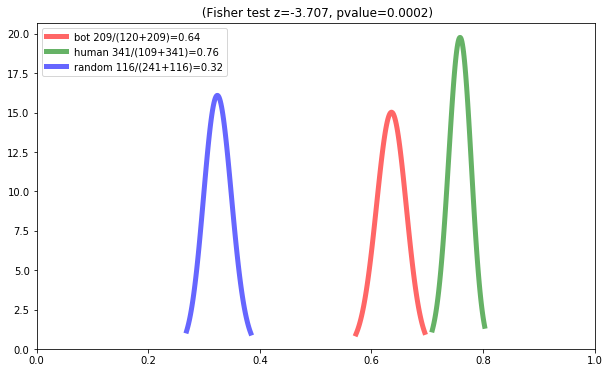

In [95]:
print(data.columns)

c = compare(data)
print('overall', len(data), c)

_, [bot, human, rnd], *_2 = c
plot_beta(bot, human, rnd)
plt.show()

### –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ —Ç–æ–ª–æ–∫–µ—Ä–∞–º –ø–µ—Ä—Å–æ–Ω–∞–ª—å–Ω–æ

Aleksey@yoptar 40 ([7.6167687270290582e-100, (-3.121784667246144, 0.001797583664099761)], [[66, 49], [8, 23], [49, 19]], 0.74193548387096775, 0.42608695652173911, 0.27941176470588236)
Alexey@ 30 ([7.6167687270290582e-100, (-3.121784667246144, 0.001797583664099761)], [[66, 49], [8, 23], [49, 19]], 0.74193548387096775, 0.42608695652173911, 0.27941176470588236)
Dilyara@baymurzinadilyara 40 ([7.6167687270290582e-100, (-3.121784667246144, 0.001797583664099761)], [[66, 49], [8, 23], [49, 19]], 0.74193548387096775, 0.42608695652173911, 0.27941176470588236)
Marat@tsundokum 16 ([7.6167687270290582e-100, (-3.121784667246144, 0.001797583664099761)], [[66, 49], [8, 23], [49, 19]], 0.74193548387096775, 0.42608695652173911, 0.27941176470588236)
Mikhail@MBurtsev 60 ([7.6167687270290582e-100, (-3.121784667246144, 0.001797583664099761)], [[66, 49], [8, 23], [49, 19]], 0.74193548387096775, 0.42608695652173911, 0.27941176470588236)
Mikhail@mikhail_arkhipov 42 ([7.6167687270290582e-100, (-3.12178466724614

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:4544: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:876: RuntimeWarning: invalid value encountered in greater_equal
  return (self.a <= x) & (x <= self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:876: RuntimeWarning: invalid value encountered in less_equal
  return (self.a <= x) & (x <= self.b)


P.@not_there 30 ([7.6167687270290582e-100, (-3.121784667246144, 0.001797583664099761)], [[66, 49], [8, 23], [49, 19]], 0.74193548387096775, 0.42608695652173911, 0.27941176470588236)
Rafael@ai_rafael 48 ([7.6167687270290582e-100, (-3.121784667246144, 0.001797583664099761)], [[66, 49], [8, 23], [49, 19]], 0.74193548387096775, 0.42608695652173911, 0.27941176470588236)
Yura@yurakuratov 29 ([7.6167687270290582e-100, (-3.121784667246144, 0.001797583664099761)], [[66, 49], [8, 23], [49, 19]], 0.74193548387096775, 0.42608695652173911, 0.27941176470588236)


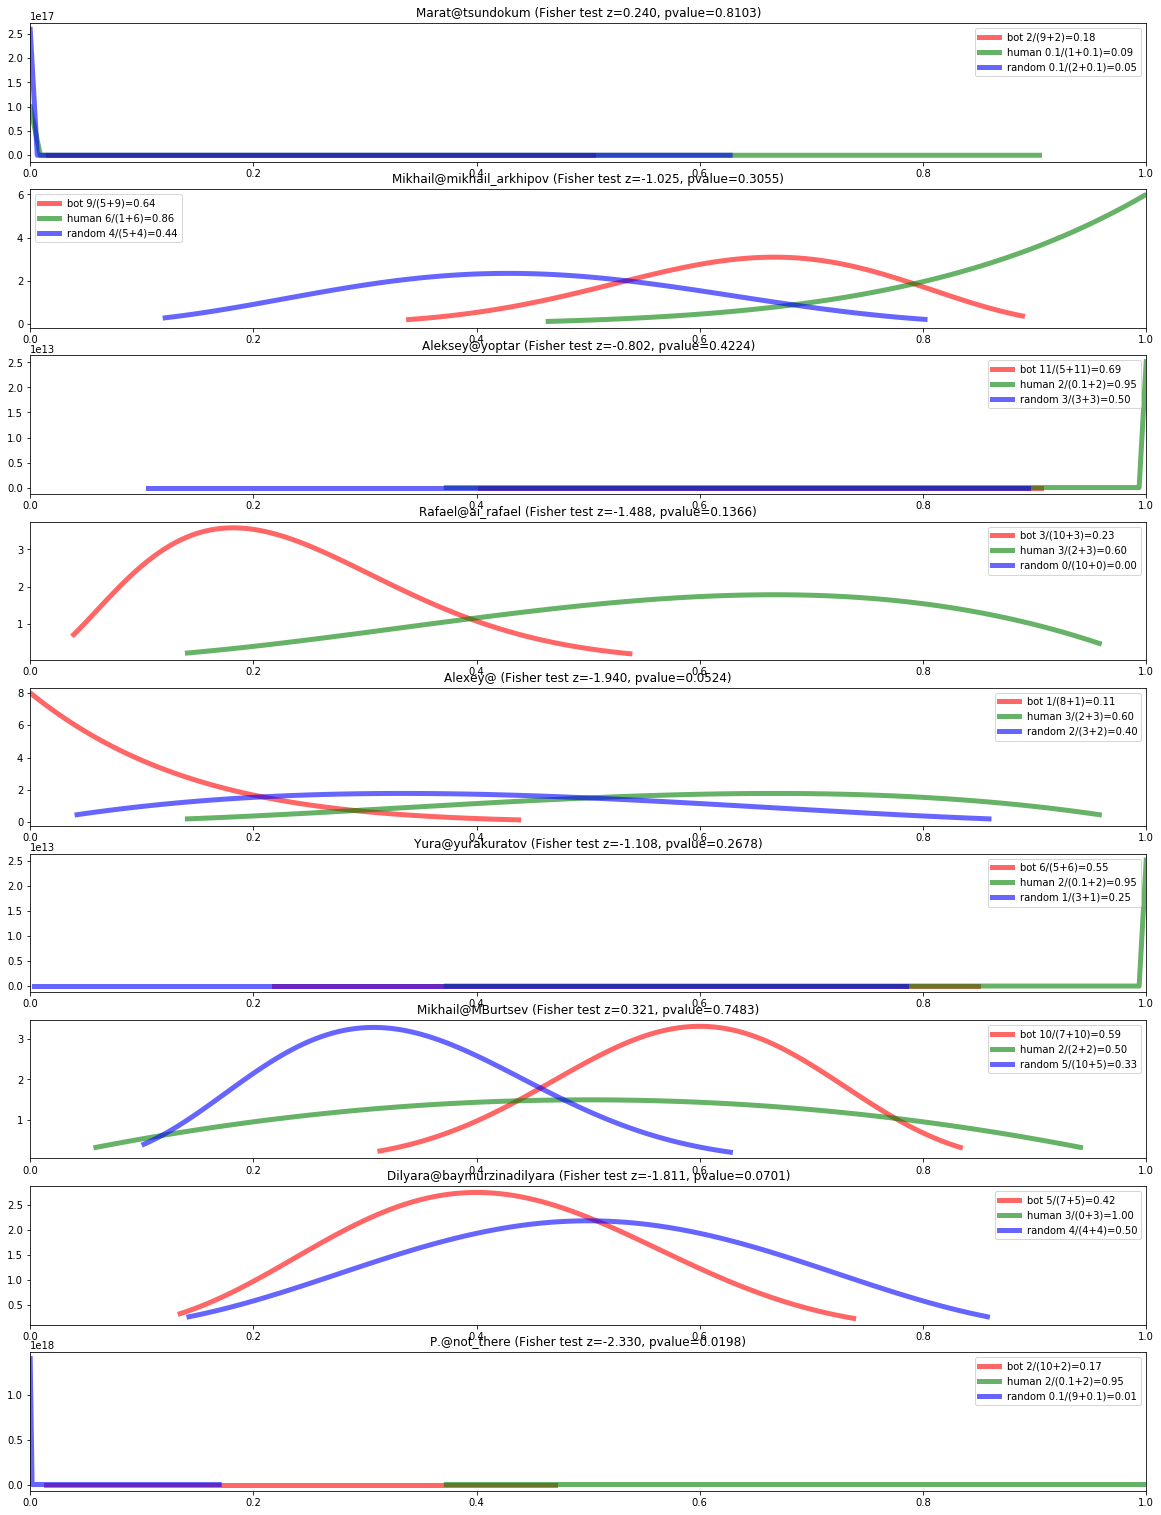

In [65]:
order = {c: i for i, c in enumerate(data['user'].unique())}

plt.figure(figsize=(20, len(order)*3))
for g, d in data.groupby('user'):
    try:
        _, [bot, human, rnd], *__ = compare(d, eps=0.1)
        plt.subplot(len(order), 1, order[g]+1)
        plot_beta(bot, human, rnd, title=g, legend=True)
        print(g, len(d), c)
    except KeyError as ex:
        print(ex)
    except ZeroDivisionError:
        print('\t>>> Not enough data for {}'.format(g))
plt.show()

### –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ –Ω–æ–≤—ã–º –∏ –æ–ø—ã—Ç–Ω—ã–º —Ç–æ–ª–æ–∫–µ—Ä–∞–º

In [66]:
data.user.unique()

array(['Marat@tsundokum', 'Mikhail@mikhail_arkhipov', 'Aleksey@yoptar',
       'Rafael@ai_rafael', 'Alexey@', 'Yura@yurakuratov',
       'Mikhail@MBurtsev', 'Dilyara@baymurzinadilyara', 'P.@not_there'], dtype=object)

In [67]:
# exp_users = ['Alexey@', 'Mikhail@MBurtsev', 'Mikhail@mikhail_arkhipov',
#        'Aleksey@yoptar', 'Dilyara@bdilya', 'Mary@vimary',
#        'Marat@tsundokum', 'Varvara@varvara_konstantinovna', 'Eugeniya üêô@fogside',
#             'Yura@yurakuratov']
# new_users = ['Roman@', 'Maksim@', 'Leonid@leonidpugachev', 'Olga@olgalind', 'Anatoly@anatoliipotapov']

# def newbie(username):
#     if username in new_users:
#         return 'newbie'
#     elif username in exp_users:
#         return 'expert'
#     else:
#         return 'unknown'


# data['newbie'] = data['user'].apply(newbie)

# order = {c: i for i, c in enumerate(data['newbie'].unique())}

# for g, d in data.groupby('newbie'):
#     try:
#         c = compare(d)
#         _, [bot, human, rnd], *_2 = c
#         print(g, len(d), )
#         plt.subplot(2, 1, order[g]+1)
#         plot_beta(bot, human, rnd, title=g)
#     except KeyError as ex:
#         print(ex)
# plt.show()        

### –í–ª–∏—è–Ω–∏–µ –¥–∏—Å–∫—Ä–∏–º–∏–Ω–∞—Ç–æ—Ä–∞


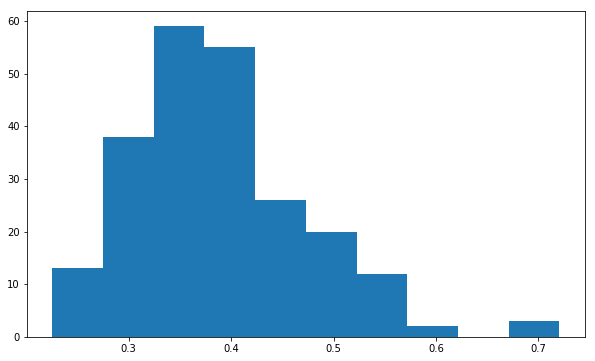

In [68]:
v = data['discriminator_score'].values
plt.hist(v[~np.isnan(v)])
plt.show()

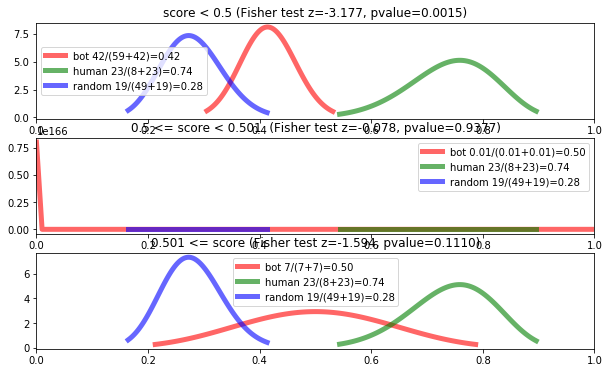

In [69]:
t1 = 0.5
t2 = 0.501
data['score_class'] = np.digitize(data['discriminator_score'], [t1, t2])

for class_id, class_title in [(0, f'score < {t1}'),
                              (1, f'{t1} <= score < {t2} '),
                              (2, f'{t2} <= score')]:
    plt.subplot(3, 1, class_id+1)
    k = (data['operator'] != 'bot') | ((data['operator'] == 'bot') & (data['score_class'] == class_id))
    _, [human, bot, rnd], *__ = compare(data[k])
    plot_beta(human, bot, rnd, title=class_title)
plt.show()

### –í–ª–∏—è–Ω–∏–µ –¥–ª–∏–Ω–Ω—ã –≤–æ–ø—Ä–æ—Å–∞

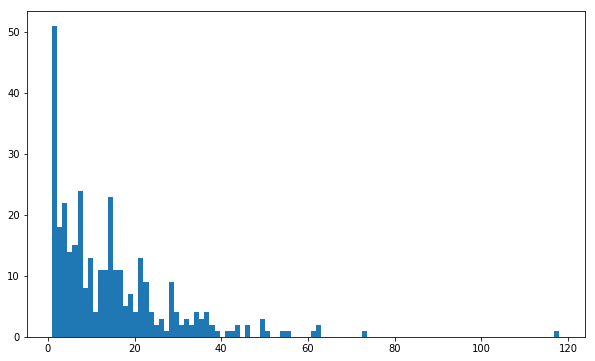

In [70]:
plt.hist(data['question'].apply(lambda x: len(word_tokenize(x))), bins=100)
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/stats/proportion.py:786: RuntimeWarning: invalid value encountered in true_divide
  prop = count * 1. / nobs
/usr/local/lib/python3.6/dist-packages/statsmodels/stats/proportion.py:802: RuntimeWarning: divide by zero encountered in true_divide
  nobs_fact = np.sum(1. / nobs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in long_scalars
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in long_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:876: RuntimeWarning: invalid value encountered in greater_equal
  return (self.a <= x) & (x <= self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:876: RuntimeWarning: invalid value encountered in less_equal
  return (self.a <= x) & (x <= s

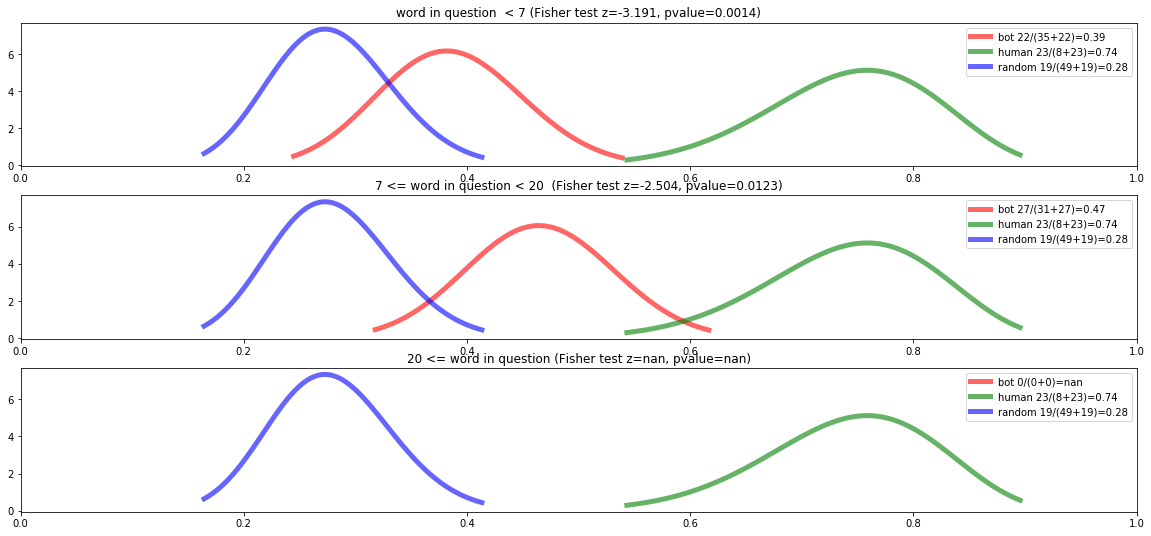

In [71]:
t1 = 7
t2 = 20
data['question_len_class'] = np.digitize(data['question'].apply(lambda x: len(word_tokenize(x))), [t1, t2])

plt.figure(figsize=(20, 3*3))
for class_id, class_title in [(0, f'word in question  < {t1}'),
                              (1, f'{t1} <= word in question < {t2} '),
                              (2, f'{t2} <= word in question')]:
    plt.subplot(3, 1, class_id+1)
    k = (data['operator'] != 'bot') | ((data['operator'] == 'bot') & (data['question_len_class'] == class_id))
    _, [human, bot, rnd], *__ = compare(data[k])
    plot_beta(human, bot, rnd, title=class_title)
plt.show()

### –í–ª–∏—è–Ω–∏–µ –¥–ª–∏–Ω—ã –≤–æ–ø—Ä–æ—Å–∞

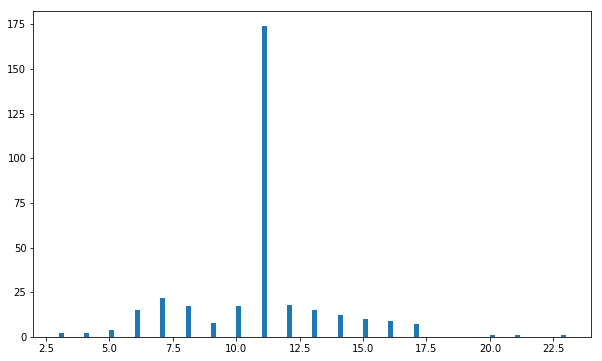

In [72]:
plt.hist(data['answer'].apply(lambda x: len(word_tokenize(x))), bins=100)
plt.show()

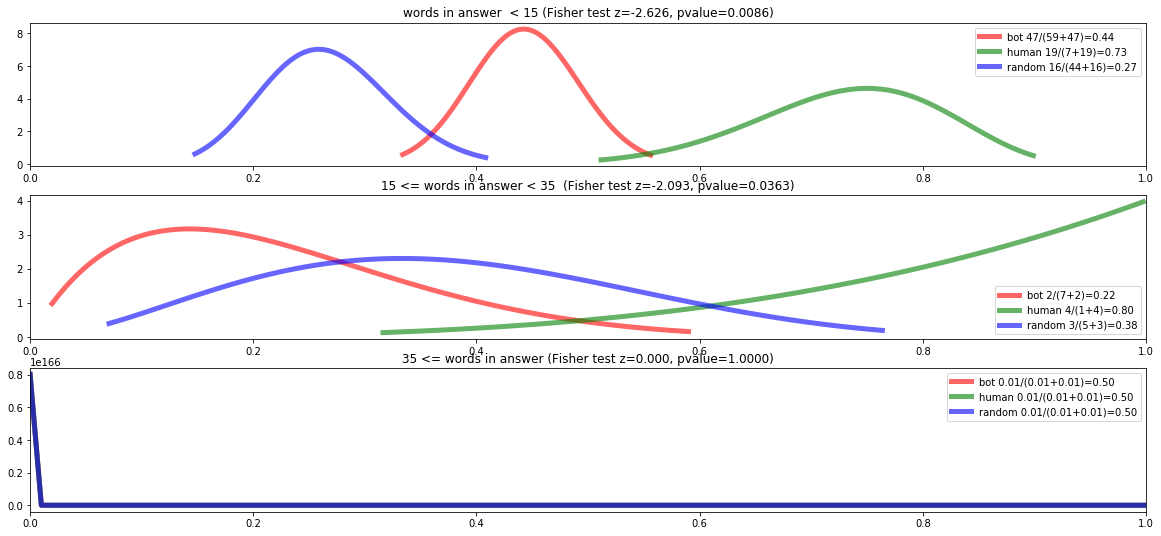

In [73]:
t1 = 15
t2 = 35
data['answer_len_class'] = np.digitize(data['answer'].apply(lambda x: len(word_tokenize(x))), [t1, t2])

plt.figure(figsize=(20, 3*3))
for class_id, class_title in [(0, f'words in answer  < {t1}'),
                              (1, f'{t1} <= words in answer < {t2} '),
                              (2, f'{t2} <= words in answer')]:
    plt.subplot(3, 1, class_id+1)
    k = (data['answer_len_class'] == class_id)
    _, [human, bot, rnd], *__ = compare(data[k])
    plot_beta(human, bot, rnd, title=class_title)
plt.show()

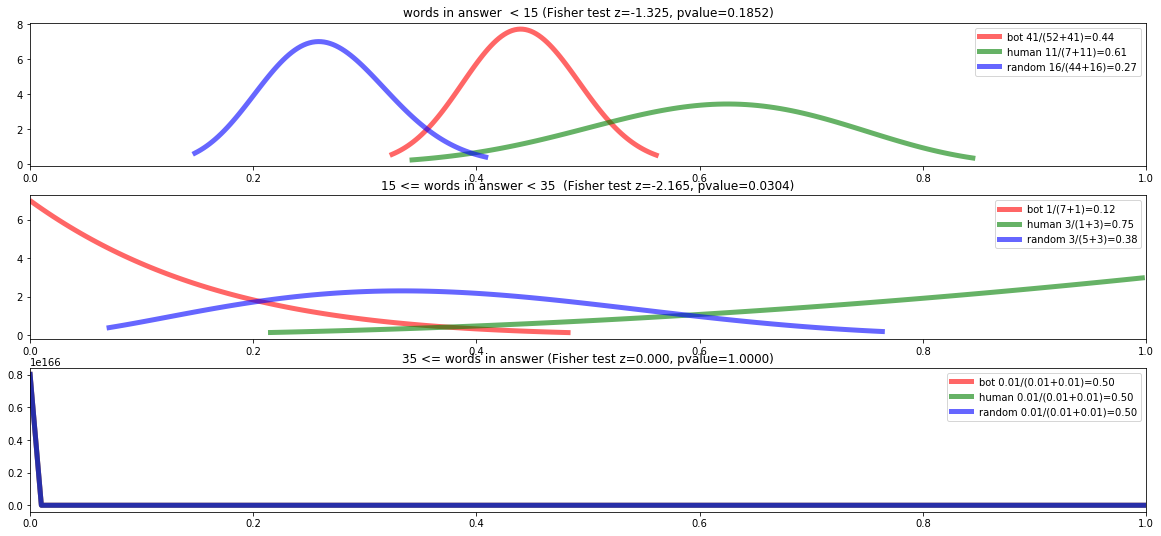

In [74]:
t1 = 15
t2 = 35
data['answer_len_class'] = np.digitize(data['answer'].apply(lambda x: len(word_tokenize(x))), [t1, t2])

plt.figure(figsize=(20, 3*3))
for class_id, class_title in [(0, f'words in answer  < {t1}'),
                              (1, f'{t1} <= words in answer < {t2} '),
                              (2, f'{t2} <= words in answer')]:
    plt.subplot(3, 1, class_id+1)
    k = (data['answer_len_class'] == class_id)
    _, [human, bot, rnd], *__ = compare(data[k & ((data['operator'] == 'random') | (data['discriminator_score'] < 0.5))])
    plot_beta(human, bot, rnd, title=class_title)
plt.show()

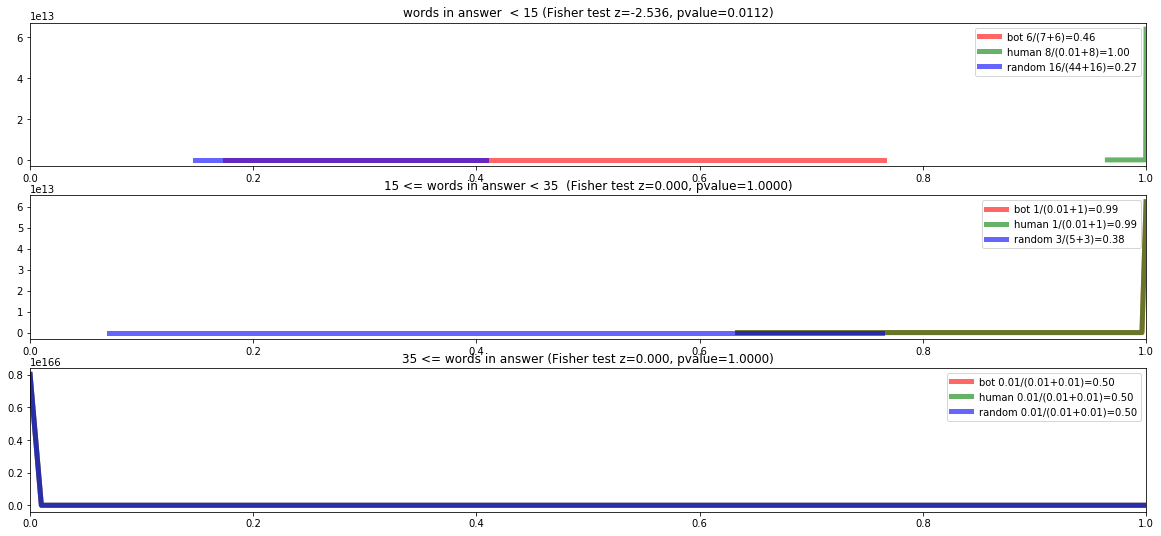

In [75]:
t1 = 15
t2 = 35
data['answer_len_class'] = np.digitize(data['answer'].apply(lambda x: len(word_tokenize(x))), [t1, t2])

plt.figure(figsize=(20, 3*3))
for class_id, class_title in [(0, f'words in answer  < {t1}'),
                              (1, f'{t1} <= words in answer < {t2} '),
                              (2, f'{t2} <= words in answer')]:
    plt.subplot(3, 1, class_id+1)
    k = (data['answer_len_class'] == class_id)
    _, [human, bot, rnd], *__ = compare(data[k & ((data['operator'] == 'random') | (data['discriminator_score'] >= 0.5))])
    plot_beta(human, bot, rnd, title=class_title)
plt.show()

In [76]:
def get_question(text):
    context, answer = text.strip().split('<ANS_START>')
    cs = context.replace('<COR_START>', ';').replace('<MAN_START>', ';').replace('<PAUSE>', ';')
    cs = [c.strip() for c in cs.split(';') if c.strip()]
    if cs:
        return cs[-1]
    else:
        ''
    
q = pd.read_csv('downloads/sber2.csv', sep=',', quotechar='"')['Text'].apply(get_question)


overall 335 ([7.6167687270290582e-100, (-3.121784667246144, 0.001797583664099761)], [[66, 49], [8, 23], [49, 19]], 0.74193548387096775, 0.42608695652173911, 0.27941176470588236)


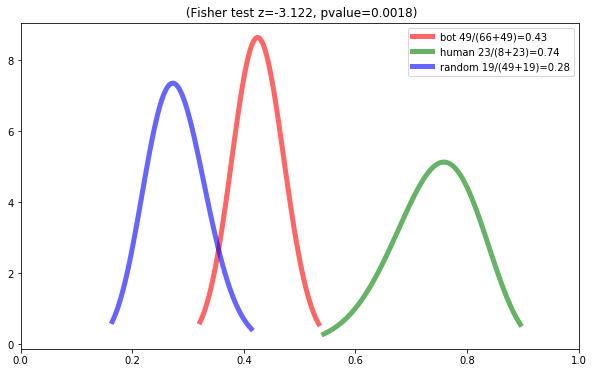

In [77]:
dt = datetime(2017, 11, 21, 15, 0)

c = compare(data[data['time_asked'].apply(lambda x: datetime.strptime(x, "%Y-%m-%dT%H:%M:%S.%f")) > dt])
print('overall', len(data), c)

_, [bot, human, rnd], *_2 = c
plot_beta(bot, human, rnd)
plt.show()

In [78]:
data[has_hello]

chat_id                       user  question_id operator  \
5    314318558   Mikhail@mikhail_arkhipov        10993    human   
13   404239771           Rafael@ai_rafael         4685    human   
21   163008481                    Alexey@         4219    human   
23   163008481                    Alexey@        11168   random   
25     2483750           Yura@yurakuratov        11116   random   
29   163008481                    Alexey@         5337   random   
31   163008481                    Alexey@        11252    human   
33   314318558   Mikhail@mikhail_arkhipov         5620      bot   
52   314318558   Mikhail@mikhail_arkhipov         5762   random   
59    35077854             Aleksey@yoptar        11162      bot   
70    87799679            Marat@tsundokum         5301      bot   
78   163008481                    Alexey@         5753      bot   
79   250566022           Mikhail@MBurtsev         5224      bot   
92   404239771           Rafael@ai_rafael         5499      bot   
96   404239771           Rafael@ai_rafael         5051      bot   
98   163008481                    Alexey@         5431   random   
100  250566022           Mikhail@MBurtsev        11259   random   
104    2483750           Yura@yurakuratov         5637      bot   
109  250566022           Mikhail@MBurtsev        14446   random   
110    2483750           Yura@yurakuratov         5267   random   
111  314318558   Mikhail@mikhail_arkhipov         4665    human   
112   35077854             Aleksey@yoptar         5423   random   
125  396504233  Dilyara@baymurzinadilyara         4523   random   
126   35077854             Aleksey@yoptar         5860      bot   
130  404239771           Rafael@ai_rafael         5397   random   
137   87799679            Marat@tsundokum         4458      bot   
143    2483750           Yura@yurakuratov         3949   random   
146  250566022           Mikhail@MBurtsev        11294      bot   
147  314318558   Mikhail@mikhail_arkhipov         4400      bot   
149  396504233  Dilyara@baymurzinadilyara         5380   random   
..         ...                        ...          ...      ...   
152  396504233  Dilyara@baymurzinadilyara         4444      bot   
155  404239771           Rafael@ai_rafael         4660      bot   
157    2483750           Yura@yurakuratov         4567      bot   
162  396504233  Dilyara@baymurzinadilyara         5190    human   
166   35077854             Aleksey@yoptar         5629    human   
186   87799679            Marat@tsundokum        11362      bot   
200   87799679            Marat@tsundokum         4037      bot   
201    2483750           Yura@yurakuratov         4353    human   
210    2483750           Yura@yurakuratov         5240      bot   
214  404239771           Rafael@ai_rafael         5326   random   
215   35077854             Aleksey@yoptar        11717      bot   
219    2483750           Yura@yurakuratov         5865      bot   
221  404239771           Rafael@ai_rafael         5552      bot   
233   35077854             Aleksey@yoptar        11297      bot   
235  404239771           Rafael@ai_rafael         4712      bot   
237  404239771           Rafael@ai_rafael         4626      bot   
252  250566022           Mikhail@MBurtsev         5377      bot   
255   31747780               P.@not_there         4840      bot   
262   31747780               P.@not_there         4492      bot   
263  250566022           Mikhail@MBurtsev         4360   random   
272  250566022           Mikhail@MBurtsev         5049      bot   
273  404239771           Rafael@ai_rafael         4785      bot   
274  250566022           Mikhail@MBurtsev         4840      bot   
285   31747780               P.@not_there         5822   random   
287   31747780               P.@not_there         5450   random   
289  250566022           Mikhail@MBurtsev         5212      bot   
307  396504233  Dilyara@baymurzinadilyara         5287      bot   
312   31747780               P.@not_there         5076

1587 -> 1226


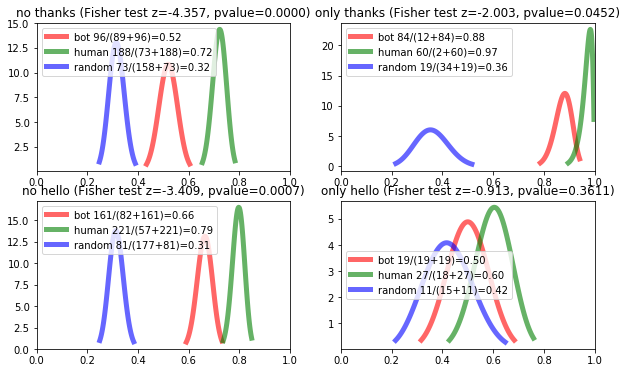

In [97]:
d = data[data['answer'].apply(lambda x: len(x.split())<=35)]
print('{} -> {}'.format(len(data), len(d)))

def has_word(word):
    def f(x):
        return word in x.lower()
    return f
has_thanks = d['question'].apply(has_word('—Å–ø–∞—Å–∏–±–æ'))
has_hello = d['question'].apply(has_word('–∑–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ'))

plt.subplot(2, 2, 1)
c = compare(d[~has_thanks])
plot_beta(*c[1], title='no thanks')

plt.subplot(2, 2, 2)
c = compare(d[has_thanks])
plot_beta(*c[1], title='only thanks')

plt.subplot(2, 2, 3)
c = compare(d[~has_hello])
plot_beta(*c[1], title='no hello')

plt.subplot(2, 2, 4)
c = compare(d[has_hello])
plot_beta(*c[1], title='only hello')


plt.show()

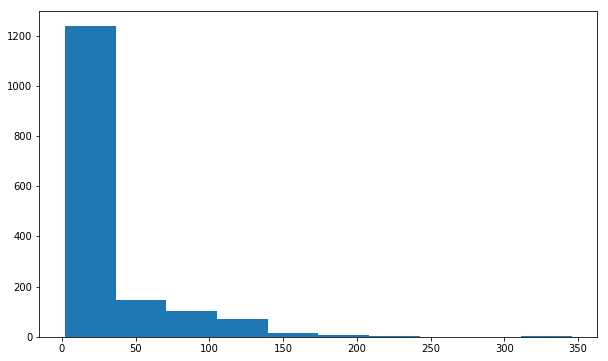

In [96]:
plt.hist(data['answer'].apply(lambda x: len(x.split())))
plt.show()